### import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
### inspect files and arrange files
#using glob to access the files and combine them into a single data frame 
files = glob.glob("states*.csv")

In [6]:
df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)
df =pd.concat(df_list).reset_index()
print(df.head())
#print(df.dtypes)

   index  Unnamed: 0       State  TotalPop             Hispanic  \
0      0           0     Alabama   4830620  3.7516156462584975%   
1      1           1      Alaska    733375   5.909580838323351%   
2      2           2     Arizona   6641928  29.565921052631502%   
3      3           3    Arkansas   2958208   6.215474452554738%   
4      4           4  California  38421464  37.291874687968054%   

                 White                Black                Native  \
0     61.878656462585%   31.25297619047618%   0.4532312925170065%   
1  60.910179640718574%  2.8485029940119775%    16.39101796407186%   
2  57.120000000000026%  3.8509868421052658%     4.35506578947368%   
3   71.13781021897813%  18.968759124087573%   0.5229197080291965%   
4   40.21578881677474%   5.677396405391911%  0.40529206190713685%   

                 Asian               Pacific              Income  \
0  1.0502551020408146%  0.03435374149659865%  $43296.35860306644   
1   5.450299401197604%   1.0586826347305378%  

### using regex to arrange the data


In [9]:
df.Income = df.Income.replace("\$"," ",regex = True)
#print(df.Income)
df.Income = pd.to_numeric(df.Income)
#print(df.Income)

In [10]:
#using split to seperate male and females
#print(df.GenderPop)
split1 = df.GenderPop.str.split("_",expand = True)
#print(split1)
split2 = split1[0].str.split("(\d+)", expand =True )
#print(split2)
split3 = split1[1].str.split("(\d+)", expand =True )
#print(split3)
#adding the gender data to our dataframe
df["Male"] = pd.to_numeric(split2[1])
df["Female"] = pd.to_numeric(split3[1])
#print(df["Male"]) 

### draw plot

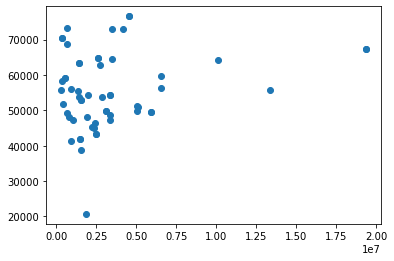

In [11]:
#scatter plot to show correlation between income and female population
plt.scatter(df["Female"],df["Income"])
plt.show()

In [14]:
#check for null values and fill them in with the difference between total pop and male columns 
print(df["Female"].isna().sum())
df["Female"] = df["Female"].fillna(df["TotalPop"]-df["Male"])
print(df["Female"].isna().sum())
# checking for duplictes
duplicate =df.duplicated()
#print(duplicate)
plt.clf()

0
0


<Figure size 432x288 with 0 Axes>

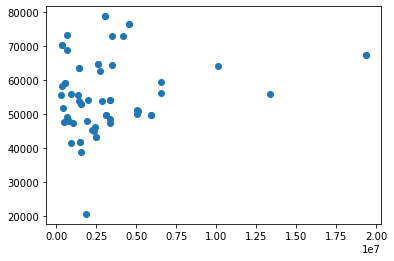

In [15]:
# plot again
plt.scatter(df["Female"],df["Income"])
plt.show()

### histogram for races

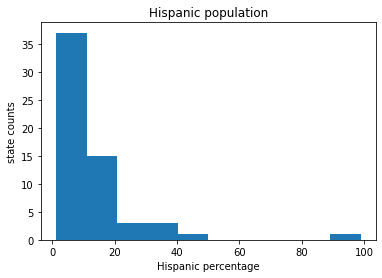

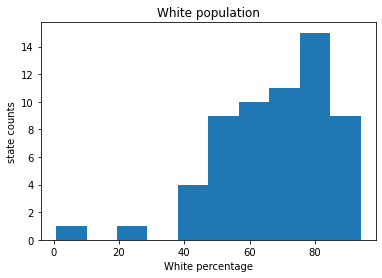

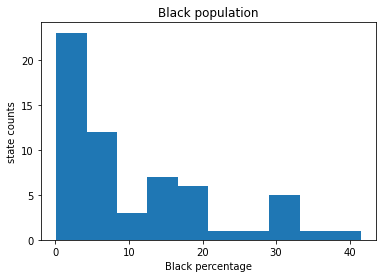

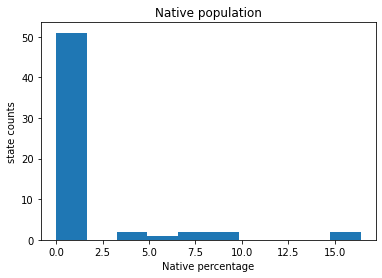

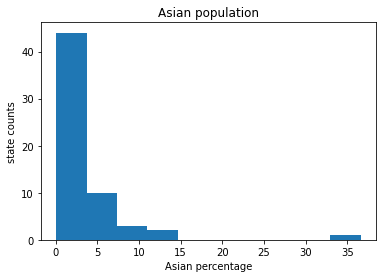

In [18]:

# df.Hispanic = df.Hispanic.replace("\%","",regex = True)
# .replace("%",""))replace("\%","",regex = True)
plt.clf()
percentage = lambda x : str(x).replace("%","")
numbers = lambda x : pd.to_numeric(x)
for i in df.columns[4:9]:
  df[i] = df[i].apply(percentage)
  df[i] = df[i].apply(numbers)
  plt.hist(df[i])
  plt.xlabel(i + " percentage")
  plt.ylabel("state counts")
  plt.title(i + " population")
  plt.show()